In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version = 1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

(-0.5, 27.5, 27.5, -0.5)

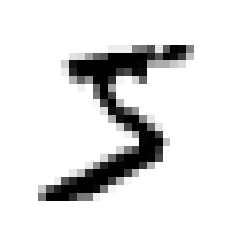

In [2]:
X, y = mnist['data'], mnist['target']
y = y.astype(np.uint8)

%matplotlib inline
import matplotlib as mpl 
import matplotlib.pyplot as plt

digit = X.loc[0].values
plt.imshow(digit.reshape(28,28), cmap = 'binary')
plt.axis('off')

In [3]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

GOAL: 97% accuracy

In [9]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

def conf_matr(classifier, X_train_ = X_train, y_train_ = y_train):

    y_pred = cross_val_predict(classifier, X_train_, y_train_, cv =3)

    conf_mx = confusion_matrix(y_train_, y_pred)
    row_sums = conf_mx.sum(axis=1, keepdims= True)
    
    norm_conf_mx = conf_mx /row_sums

    np.fill_diagonal(norm_conf_mx, 0)
    plt.matshow(norm_conf_mx, cmap = plt.cm.gray)
    
    plt.show()

In [5]:
def display_scores(scores):
    print('Scores: ', scores)
    print('Mean: ', scores.mean())
    print('Scores std: ', scores.std())

In [6]:
# RANDOM FOREST: 

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score



In [ ]:
forest = RandomForestClassifier()
cross_val_score(forest, X_train, y_train, cv =3, scoring = 'accuracy')

conf_matr(forest)

In [7]:
# KNC:

from sklearn.neighbors import KNeighborsClassifier

KNC = KNeighborsClassifier()

cross_val_score(KNC, X_train, y_train, cv =3, scoring = 'accuracy')

array([0.9676 , 0.9671 , 0.96755])

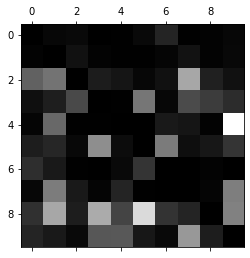

In [10]:
conf_matr(KNC)

In [15]:
from sklearn.decomposition import PCA

pca= PCA(n_components = 0.95)
X_reduced = pca.fit_transform(X_train)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_reduced.astype(np.float64))

In [20]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_neighbors' : [3, 5, 11 ,19], 'weights': ['uniform', 'distance']
    },  
                ]

grid_search = GridSearchCV(KNC, param_grid, verbose=1, cv=3,
                           n_jobs=-1, scoring = 'accuracy', return_train_score=True)

grid_search.fit(X_train_scaled, y_train)

grid_search.best_params_ 
#{'n_neighbors': 3}

Fitting 3 folds for each of 8 candidates, totalling 24 fits


{'n_neighbors': 3, 'weights': 'distance'}

In [21]:
scores_KNC = cross_val_score(grid_search.best_estimator_, X_reduced, y_train, scoring ='accuracy', cv = 3)

display_scores(scores_KNC)
#Scores:  [0.9718 0.9696 0.9704]
#Mean:  0.9706
#Scores std:  0.0009092121131323798

Scores:  [0.97315 0.9705  0.9717 ]
Mean:  0.9717833333333333
Scores std:  0.001083461530876305


In [ ]:
# PIXEL IMPORTANCE (p. 199)
# DIMENSIONALITY REDUCTION